# Geometric Transformations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

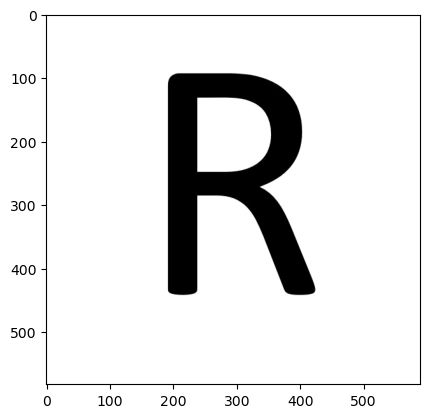

In [3]:
img = plt.imread('pictures/R.jpg')
img = img[:,:,0]
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

### Translation
- Moving up by $k$ pixels:
$P'(x,y) = P(x, y-k)$

- Moving down by $k$ pixels:
$P'(x,y) = P(x, y+k)$

- Moving left by $k$ pixels:
$P'(x,y) = P(x-k, y)$

- Moving right by $k$ pixels:
$P'(x,y) = P(x+k, y)$

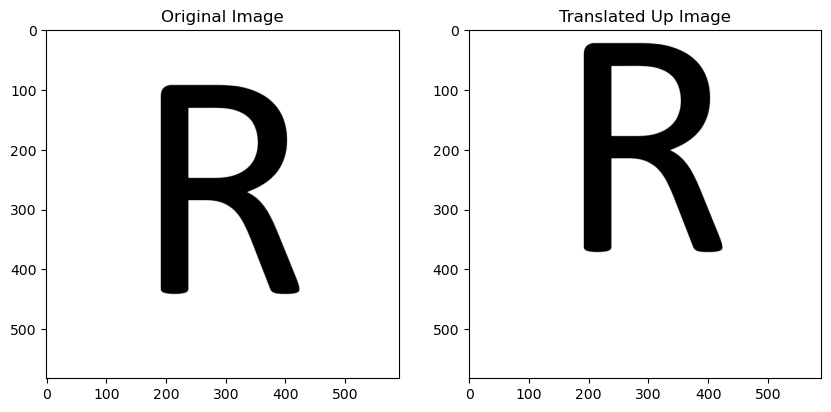

In [15]:
# Moving up
pixels = 70
img_translated_up = np.full(shape=img.shape, fill_value=255, dtype=np.uint8)    # Generating a white image
img_translated_up[:-pixels, :] = img[pixels:, :]
# Mapping rows (y) 70 to end from original image to 0 to (end-70). This way rows 0 to 69 (70 rows) will be effectively deleted
# and rows (end-70) + 1 to end (70 rows) will be untouched or we've already filled them with white background color.

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(img_translated_up, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Translated Up Image')

# plt.savefig('pictures/R_translated_up.jpg')
plt.show()

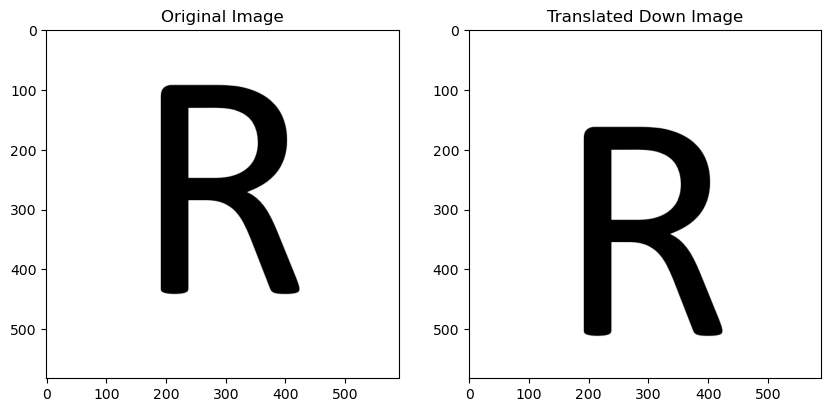

In [17]:
# Moving down
pixels = 70
img_translated_down = np.full(shape=img.shape, fill_value=255, dtype=np.uint8)    # Generating a white image
img_translated_down[pixels:, :] = img[:-pixels, :]
# Mapping rows (y) 0 to (end-70) from original image to 70 to end. This way rows (end-70) + 1 to end (70 rows) will be effectively deleted
# and rows 0 to 69 (70 rows) will be untouched or we've already filled them with white background color.

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(img_translated_down, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Translated Down Image')

# plt.savefig('pictures/R_translated_down.jpg')
plt.show()

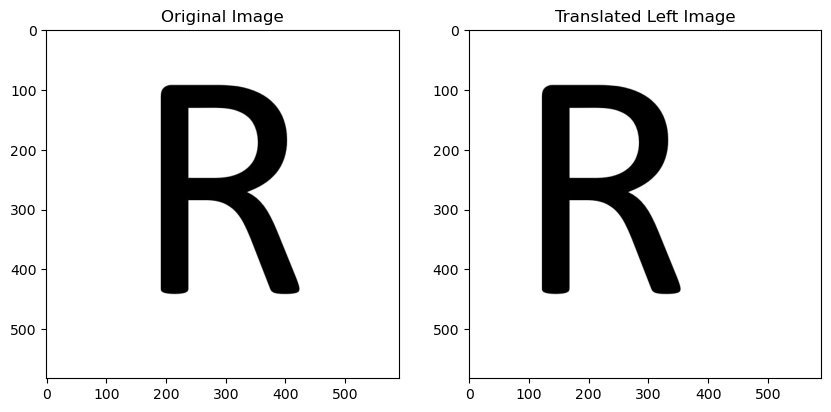

In [18]:
# Moving left
pixels = 70
img_translated_left = np.full(shape=img.shape, fill_value=255, dtype=np.uint8)    # Generating a white image
img_translated_left[:, :-pixels] = img[:, pixels:]
# Mapping columns (x) 70 to end from original image to 0 to (end-70). This way columns 0 to 69 (70 columns) will be effectively deleted
# and columns (end-70) + 1 to end (70 columns) will be untouched or we've already filled them with white background color.

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(img_translated_left, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Translated Left Image')

# plt.savefig('pictures/R_translated_left.jpg')
plt.show()

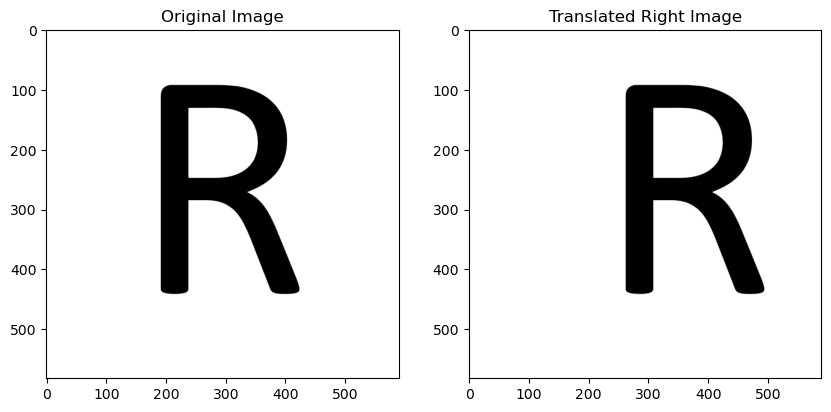

In [19]:
# Moving right
pixels = 70
img_translated_right = np.full(shape=img.shape, fill_value=255, dtype=np.uint8)    # Generating a white image
img_translated_right[:, pixels:] = img[:, :-pixels]
# Mapping columns (x) 0 to (end-70) from original image to 70 to end. This way columns (end-70) + 1 to end (70 columns) will be effectively deleted
# and columns 0 to 69 (70 columns) will be untouched or we've already filled them with white background color.

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(img_translated_right, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Translated Right Image')

# plt.savefig('pictures/R_translated_right.jpg')
plt.show()

### Flipping
- Horizontal Flip:
$P'(x,y) = P(-x, y)$

- Vertical Flip:
$P'(x,y) = P(x, -y)$

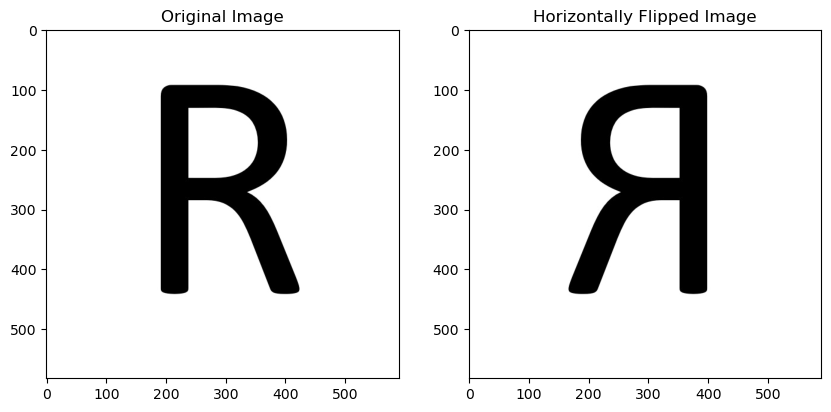

In [13]:
# Horizontal Flip
img_h_flipped = img.copy()
img_h_flipped = np.fliplr(img_h_flipped) # Columns flipped (x-axis values flipped)

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(img_h_flipped, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Horizontally Flipped Image')

# plt.savefig('pictures/R_horizontally_flipped.jpg')
plt.show()

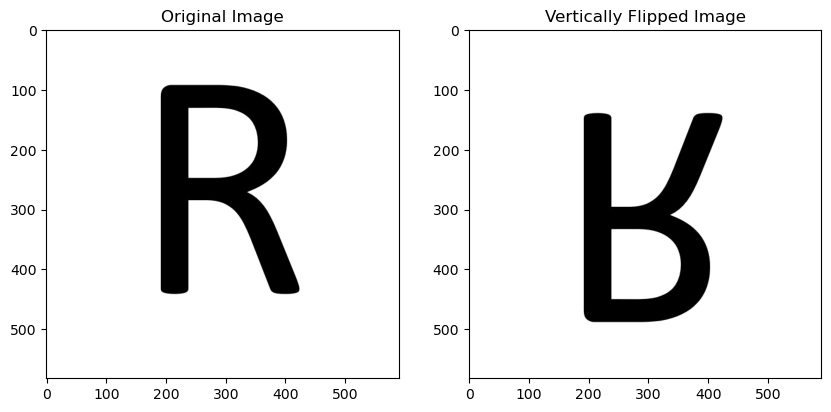

In [44]:
# Vertical Flip
img_v_flipped = img.copy()
img_v_flipped = np.flipud(img_v_flipped)    # Rows flipped (y-axis values flipped)

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(img_v_flipped, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Vertically Flipped Image')

# plt.savefig('pictures/R_vertically_flipped.jpg')
plt.show()

### Rotation

![Image](pictures/rot%20mat.png)

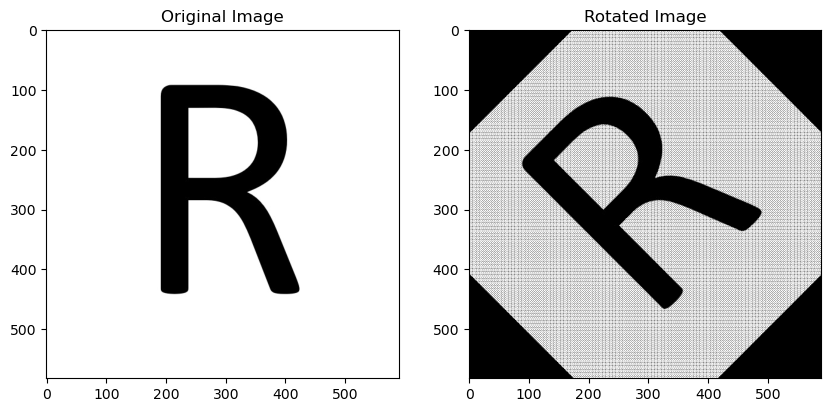

In [515]:
def rotate_image(image, angle):
    """
    Rotate an image by a given angle using nearest-neighbor interpolation.

    Parameters:
    - image: input image (numpy array)
    - angle: rotation angle in degrees (+ve for CCW and -ve for CW)

    Returns:
    - Rotated image
    """
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)

    # Define rotation matrix
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)
    sin_theta = -sin_theta          # Compensating the inverted y-axis in images
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])

    # Get the dimensions of the original image
    height, width = image.shape[:2]

    # Create coordinate grid for the original image
    y_indices, x_indices = np.indices((height, width))
    coords = np.stack([x_indices, y_indices], axis=-1).reshape(-1, 2)

    # Compute the center of the image
    center = np.array([width // 2, height // 2])

    # Translate coordinates to center, apply rotation, and translate back
    centered_coords = coords - center
    rotated_coords = centered_coords @ rotation_matrix.T
    new_coords = np.round(rotated_coords + center).astype(int)

    # Create an empty array for the rotated image
    rotated_image = np.full((height, width), fill_value=256)
    # 256 is an invalid value, we'll replace it in the end. It will help in identifying pixels with no value assigned.

    # Filter coordinates to be within the bounds of the new image
    valid_indices = (
        (new_coords[:, 0] >= 0) & (new_coords[:, 0] < width) &
        (new_coords[:, 1] >= 0) & (new_coords[:, 1] < height)
    )
    original_indices = coords[valid_indices]
    empty_indices = coords[~valid_indices]
    valid_new_coords = new_coords[valid_indices]

    # Assign the pixel values to the new coordinates
    rotated_image[valid_new_coords[:, 1], valid_new_coords[:, 0]] = image[original_indices[:, 1], original_indices[:, 0]]
    rotated_image[empty_indices[:, 1], empty_indices[:, 0]] = 0     # Make the unoccupied edges black

    missing_coords = np.argwhere(rotated_image == 256)  # Find pixels which are unoccupied within image due to rounding off

    # Apply nearest neighbor interpolation for missing values
    for y, x in missing_coords:
        # Find nearest neighbor coordinates within rotated_image
        if y > 0 and rotated_image[y - 1, x] != 256:
            rotated_image[y, x] = rotated_image[y - 1, x]
        elif y < height - 1 and rotated_image[y + 1, x] != 256:
            rotated_image[y, x] = rotated_image[y + 1, x]
        elif x > 0 and rotated_image[y, x - 1] != 256:
            rotated_image[y, x] = rotated_image[y, x - 1]
        elif x < width - 1 and rotated_image[y, x + 1] != 256:
            rotated_image[y, x] = rotated_image[y, x + 1]

    return rotated_image.astype(np.uint8)

angle = 45
imgr = rotate_image(img, angle)

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plt.imsave('R_rotated.jpg', imgr, cmap='gray', vmin=0, vmax=255)
# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(imgr, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Rotated Image')
# plt.savefig('pictures/R_rotated.jpg')
plt.show()

### Shear

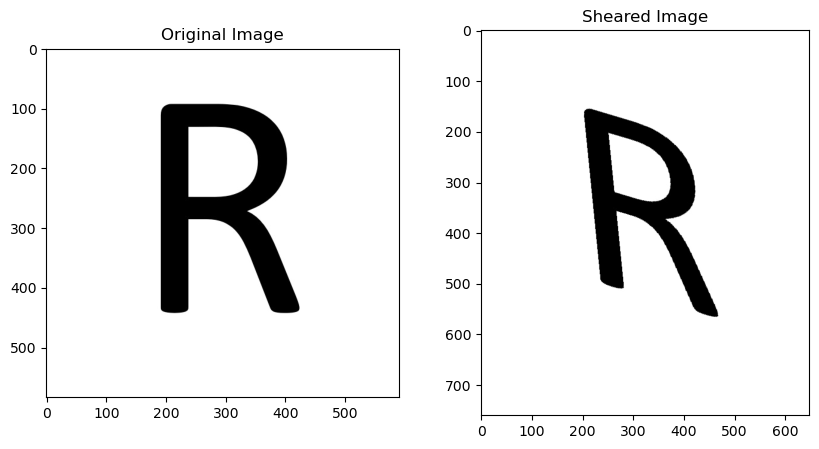

In [503]:
def shear_image(image, shear_factor_x=0, shear_factor_y=0):
    """
    Rotate an image by a given angle using nearest-neighbor interpolation.

    Parameters:
    - image: input image (numpy array)
    - shear_factor_x: Horizontal shear coefficient
    - shear_factor_y: Vertical shear coefficient

    Returns:
    - Sheared image
    """
    # shear_factor_y = -shear_factor_y          # Compensating inverted y-axis in images
    shear_matrix = np.array([[1, shear_factor_x], [shear_factor_y, 1]])

    # Get the dimensions of the original image
    height, width = image.shape[:2]
    new_width = int(width + abs(shear_factor_x * height))
    new_height = int(height + abs(shear_factor_y * width))

    # Create coordinate grid for the original image
    y_indices, x_indices = np.indices((height, width))
    coords = np.stack([x_indices, y_indices], axis=-1).reshape(-1, 2)

    # Translate coordinates to center, apply rotation, and translate back
    sheared_coords = coords @ shear_matrix.T
    new_coords = np.round(sheared_coords).astype(int)

    # Create an empty array for the rotated image
    sheared_image = np.full((new_height, new_width), fill_value=256)
    # 256 is an invalid value, we'll replace it in the end. It will help in identifying pixels with no value assigned.

    # Filter coordinates to be within the bounds of the new image
    valid_indices = (
        (new_coords[:, 0] >= 0) & (new_coords[:, 0] < new_width) &
        (new_coords[:, 1] >= 0) & (new_coords[:, 1] < new_height)
    )
    original_indices = coords[valid_indices]
    valid_new_coords = new_coords[valid_indices]

    # Assign the pixel values to the new coordinates
    sheared_image[valid_new_coords[:, 1], valid_new_coords[:, 0]] = image[original_indices[:, 1], original_indices[:, 0]]

    missing_coords = np.argwhere(sheared_image == 256)  # Find pixels which are unoccupied within image due to rounding off

    # Apply nearest neighbor interpolation for missing values
    for y, x in missing_coords:
        # Find nearest neighbor coordinates within sheared_image
        if y > 0 and sheared_image[y - 1, x] != 256:
            sheared_image[y, x] = sheared_image[y - 1, x]
        elif y < height - 1 and sheared_image[y + 1, x] != 256:
            sheared_image[y, x] = sheared_image[y + 1, x]
        elif x > 0 and sheared_image[y, x - 1] != 256:
            sheared_image[y, x] = sheared_image[y, x - 1]
        elif x < width - 1 and sheared_image[y, x + 1] != 256:
            sheared_image[y, x] = sheared_image[y, x + 1]

    return sheared_image.astype(np.uint8)

imgr = shear_image(img, shear_factor_x=0.1, shear_factor_y=0.3)

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plt.imsave('R_rotated.jpg', imgr, cmap='gray', vmin=0, vmax=255)
# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(imgr, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Sheared Image')
# plt.savefig('pictures/R_sheared.jpg')
plt.show()

## Linear Transformation Matrices
Linear transformations can be represented using matrices, and different transformations have distinct matrix forms. Below are the forms for various linear transformations:

### 1. **Identity Transformation**
The identity matrix leaves the vector unchanged.

$
I = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$

### 2. **Rotation**
Rotates a vector by an angle $ \theta $ around the origin.

$
R(\theta) = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
$

### 3. **Scaling**
Scales a vector by factors $ s_x $ and $ s_y $ along the x and y axes, respectively.

$
S(s_x, s_y) = \begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix}
$

### 4. **Shearing**
Shears the vector along the x-axis or y-axis.

- Shear along the x-axis:

  $
  Sh_x = \begin{bmatrix}
  1 & k \\
  0 & 1
  \end{bmatrix}
  $
- Shear along the y-axis:

  $
  Sh_y = \begin{bmatrix}
  1 & 0 \\
  k & 1
  \end{bmatrix}
  $

### 5. **Reflection**
Reflects a vector across a line through the origin.

- Reflection across the x-axis:

  $
  Ref_x = \begin{bmatrix}
  1 & 0 \\
  0 & -1
  \end{bmatrix}
  $
- Reflection across the y-axis:

  $
  Ref_y = \begin{bmatrix}
  -1 & 0 \\
  0 & 1
  \end{bmatrix}
  $

### 6. **Projection**
Projects a vector onto a line.

- Projection onto the x-axis:

  $
  P_x = \begin{bmatrix}
  1 & 0 \\
  0 & 0
  \end{bmatrix}
  $
- Projection onto the y-axis:

  $
  P_y = \begin{bmatrix}
  0 & 0 \\
  0 & 1
  \end{bmatrix}
  $

### 7. **General Linear Transformation**
Any linear transformation can be represented by a general 2x2 matrix:

$
T = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$

## Affine Transformation

An affine transformation can be considered a linear transformation followed by a translation. In more formal terms, an affine transformation consists of applying a linear transformation (such as rotation, scaling, or shearing) to the points in a space, and then translating the points by adding a vector.


The general form of an affine transformation in 2D can be expressed as:

$$
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
=
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
+
\begin{pmatrix}
t_x \\
t_y
\end{pmatrix}
$$

Here:
- $ \begin{pmatrix} a & b \\ c & d \end{pmatrix} $ is the linear transformation matrix.
- $ \begin{pmatrix} t_x \\ t_y \end{pmatrix} $ is the translation vector.

### Homogeneous Coordinates

Affine transformations are often conveniently represented using homogeneous coordinates, which allow for the combination of linear transformation and translation into a single matrix operation. The 2D affine transformation matrix in homogeneous coordinates is a 3x3 matrix:

$$
A = \begin{pmatrix}
a & b & t_x \\
c & d & t_y \\
0 & 0 & 1
\end{pmatrix}
$$

Applying this matrix to a point $ (x, y) $ in homogeneous coordinates $x, y, 1) $ields:

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
a & b & t_x \\
c & d & t_y \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

This results in the following equations:

$$
x' = ax + by + t_x
$$

$$
y' = cx + dy + t_y
$$

### Components of Affine Transformation

1. **Linear Transformation**: The matrix $ \begin{pmatrix} a & b \\ c & d \end{pmatrix} $ can represent any combination of rotation, scaling, shearing, and reflection.
2. **Translation**: The vector $\begin{pmatrix} t_x \\ t_y \end{pmatrix} $ shifts the points by $x \$n the x-direction and $_y $n the y-direction.

### Examples

- **Rotation** (without translation):
  $$
  R(\theta) = \begin{pmatrix}
  \cos \theta & -\sin \theta & 0 \\
  \sin \theta & \cos \theta & 0 \\
  0 & 0 & 1
  \end{pmatrix}
  $$

- **Scaling** (without translation):
  $$
  S(s_x, s_y) = \begin{pmatrix}
  s_x & 0 & 0 \\
  0 & s_y & 0 \\
  0 & 0 & 1
  \end{pmatrix}
  $$

- **Translation** (without linear transformation):
  $$
  T(t_x, t_y) = \begin{pmatrix}
  1 & 0 & t_x \\
  0 & 1 & t_y \\
  0 & 0 & 1
  \end{pmatrix}
  $$

- **Combined Affine Transformation** (linear transformation + translation):
  $$
  A = \begin{pmatrix}
  a & b & t_x \\
  c & d & t_y \\
  0 & 0 & 1
  \end{pmatrix}
  $$

### Summary

In essence, affine transformations encompass all the features of linear transformations and additionally allow for translations. This makes affine transformations more versatile for various geometric manipulations in 2D and 3D space.

### Translation using Matrix

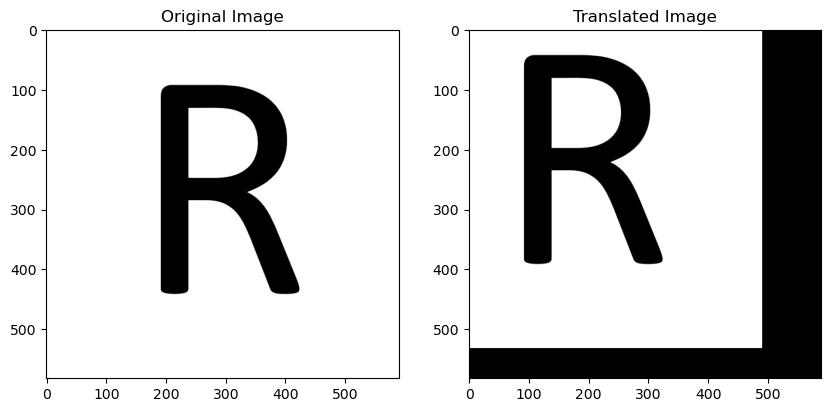

In [479]:
def translate_image(image, tx, ty):

    ty = -ty        #Compensating the inverted y-axis
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])

    # Get the dimensions of the original image
    height, width = image.shape

    # Create coordinate grid for the original image
    y_indices, x_indices = np.indices((height, width))
    coords = np.stack([x_indices, y_indices], axis=-1).reshape(-1, 2)
    coords = np.concatenate([coords, np.ones((coords.shape[0], 1))], axis=1).astype(int)

    translated_coords = coords @ translation_matrix.T

    # Create an empty array for the rotated image
    translated_image = np.zeros((height, width))

    # Filter coordinates to be within the bounds of the new image
    valid_indices = (
        (translated_coords[:, 0] >= 0) & (translated_coords[:, 0] < width) &
        (translated_coords[:, 1] >= 0) & (translated_coords[:, 1] < height)
    )
    original_indices = coords[valid_indices]
    valid_new_coords = translated_coords[valid_indices]

    # Assign the pixel values to the new coordinates
    translated_image[valid_new_coords[:, 1], valid_new_coords[:, 0]] = image[original_indices[:, 1], original_indices[:, 0]]


    return translated_image.astype(np.uint8)

tx = -100
ty = 50
imgt = translate_image(img, tx, ty)

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(imgt, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Translated Image')
plt.show()

### Scaling

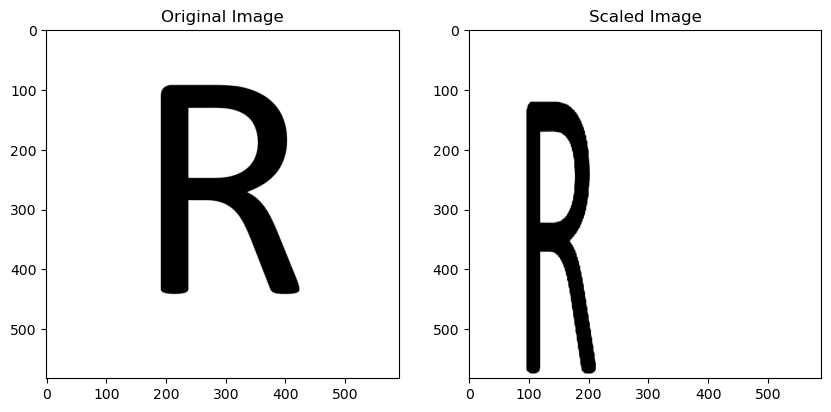

In [513]:
def scale_image(image, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])

    # Get the dimensions of the original image
    height, width = image.shape

    # Create coordinate grid for the original image
    y_indices, x_indices = np.indices((height, width))
    coords = np.stack([x_indices, y_indices], axis=-1).reshape(-1, 2)
    coords = np.concatenate([coords, np.ones((coords.shape[0], 1))], axis=1).astype(int)

    scaled_coords = coords @ scaling_matrix.T
    scaled_coords = np.round(scaled_coords).astype(int)

    # Create an empty array for the rotated image
    scaled_image = np.full((height, width), fill_value=256)

    # Filter coordinates to be within the bounds of the new image
    valid_indices = (
        (scaled_coords[:, 0] >= 0) & (scaled_coords[:, 0] < width) &
        (scaled_coords[:, 1] >= 0) & (scaled_coords[:, 1] < height)
    )
    original_indices = coords[valid_indices]
    valid_new_coords = scaled_coords[valid_indices]

    # Assign the pixel values to the new coordinates
    scaled_image[valid_new_coords[:, 1], valid_new_coords[:, 0]] = image[original_indices[:, 1], original_indices[:, 0]]
    missing_coords = np.argwhere(scaled_image == 256)  # Find pixels which are unoccupied within image due to rounding off

    # Apply nearest neighbor interpolation for missing values
    for y, x in missing_coords:
        # Find nearest neighbor coordinates within sheared_image
        if y > 0 and scaled_image[y - 1, x] != 256:
            scaled_image[y, x] = scaled_image[y - 1, x]
        elif y < height - 1 and scaled_image[y + 1, x] != 256:
            scaled_image[y, x] = scaled_image[y + 1, x]
        elif x > 0 and scaled_image[y, x - 1] != 256:
            scaled_image[y, x] = scaled_image[y, x - 1]
        elif x < width - 1 and scaled_image[y, x + 1] != 256:
            scaled_image[y, x] = scaled_image[y, x + 1]

    return scaled_image.astype(np.uint8)

sx = 0.5
sy = 1.3
imgs = scale_image(img, sx, sy)

# Displaying
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(imgs, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Scaled Image')
plt.show()

## Projective Transformation

A projective transformation, also known as a homography, is a more general case of an affine transformation. Both transformations can be represented using matrices, but the projective transformation matrix is more general and can represent a wider range of transformations. Here’s how they relate to each other:

### Affine Transformation

An affine transformation can be expressed as:

$$
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
=
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
+
\begin{pmatrix}
t_x \\
t_y
\end{pmatrix}
$$

In homogeneous coordinates, it can be represented as a $3 \times 3$ matrix:

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
a & b & t_x \\
c & d & t_y \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

### Projective Transformation

A projective transformation can be represented by a more general $3 \times 3$trix:

$$
\begin{pmatrix}
x' \\
y' \\
w'
\end{pmatrix}
=
\begin{pmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

This results in the transformed coordinates:

$$
x' = \frac{h_{11}x + h_{12}y + h_{13}}{h_{31}x + h_{32}y + h_{33}}
$$
$$
y' = \frac{h_{21}x + h_{22}y + h_{23}}{h_{31}x + h_{32}y + h_{33}}
$$

### Relationship Between Affine and Projective Transformations

The projective transformation matrix can represent any affine transformation by setting specific constraints on its elements. An affine transformation is a special case of a projective transformation where the last row of the matrix is $[0, 0, 1]$

$$
\begin{pmatrix}
a & b & t_x \\
c & d & t_y \\
0 & 0 & 1
\end{pmatrix}
$$

In contrast, a general projective transformation matrix has non-zero elements in the last row, which introduces perspective effects and allows for a more extensive range of transformations, including:

- **Affine transformations**: When $h_{31} = 0$, $h_{32} = 0$, and $h_{33} = 1$.
- **Perspective transformations**: When $h_{31}$and/or $h_{32}$ are non-zero.

### Visual Differences

Visually, projective transformations can produce effects that affine transformations cannot:

1. **Perspective distortion**: Projective transformations can make parallel lines converge, mimicking the effect of viewing objects from an angle.
2. **Tilting and slanting**: Projective transformations can tilt or slant parts of the image, changing the apparent orientation and shape of objects.


In summary, projective transformations provide greater flexibility and can model more complex distortions compared to affine transformations, which are limited to linear transformations and translations.